In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ecommerce-customer-churn-analysis-and-prediction/E Commerce Dataset.xlsx


In [2]:
pip install xlrd

     |████████████████████████████████| 96 kB 712 kB/s 
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install openpyxl

     |████████████████████████████████| 242 kB 868 kB/s 
  Created wheel for et-xmlfile: filename=et_xmlfile-1.0.1-py3-none-any.whl size=8913 sha256=40b3c3920b71867297d88be13c8f36d89cb8a3c48caf23cb04815dcad0212f47
  Stored in directory: /root/.cache/pip/wheels/e2/bd/55/048b4fd505716c4c298f42ee02dffd9496bb6d212b266c7f31
Successfully built et-xmlfile
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_excel('/kaggle/input/ecommerce-customer-churn-analysis-and-prediction/E Commerce Dataset.xlsx', sheet_name='E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


# Understanding the dataset

In [6]:
df.shape

(5630, 20)

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [9]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

From the preliminary Data set we can see that there are certain missing values. There are no duplicate entries.

There are 5630 rows and 20 columns.

Looking at the Data types, it doesnt look like there's any anomaly in the values in the dataset. 

Checking for the Data Hygiene in the dataset -> Lets see the value counts of each of the categorical variables

In [10]:
for i in df.columns:
    if df[i].dtypes == 'object':
        print(i)
        print()
        print('the values are:') 
        print(df[i].value_counts())
        print()
        print()

PreferredLoginDevice

the values are:
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64


PreferredPaymentMode

the values are:
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64


Gender

the values are:
Male      3384
Female    2246
Name: Gender, dtype: int64


PreferedOrderCat

the values are:
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64


MaritalStatus

the values are:
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64




The variables above look fine hence there is no need to do anything from the perspective of data hygiene 

# Handling the Missing Values

Copying the data frame into another one

In [11]:
df1=df.copy()

In [12]:
df.drop(['CustomerID'],axis=1, inplace=True)

Lets first single out those variables where there are missing values:

In [13]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        print(i)
        print('the total null values are:', df[i].isnull().sum())
        print('the datatype is', df[i].dtypes)
        print()

Tenure
the total null values are: 264
the datatype is float64

WarehouseToHome
the total null values are: 251
the datatype is float64

HourSpendOnApp
the total null values are: 255
the datatype is float64

OrderAmountHikeFromlastYear
the total null values are: 265
the datatype is float64

CouponUsed
the total null values are: 256
the datatype is float64

OrderCount
the total null values are: 258
the datatype is float64

DaySinceLastOrder
the total null values are: 307
the datatype is float64



Also converting the Churn variable to object

In [14]:
df['Churn'] = df['Churn'].astype('object')
df['CityTier'] = df['CityTier'].astype('object')

In [15]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00
OrderAmountHikeFromlastYear,5365.0,15.707922,3.675485,11.0,13.00,15.00,18.0000,26.00
CouponUsed,5374.0,1.751023,1.894621,0.0,1.00,1.00,2.0000,16.00
OrderCount,5372.0,3.008004,2.939680,1.0,1.00,2.00,3.0000,16.00


First lets go about filling the missing values by the median values -> Mean and median values are very close for all the above variables hence we will prefer filling the median values.

In [16]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        df[i].fillna(df[i].median(),inplace=True)

# Outlier Treatment

We will now treat outliers. For this we will define the lower range and upper range which is going to be at a distnace of 1.5 times the Interquartile range from the respective whiskers

Text(0, 0.5, 'Values')

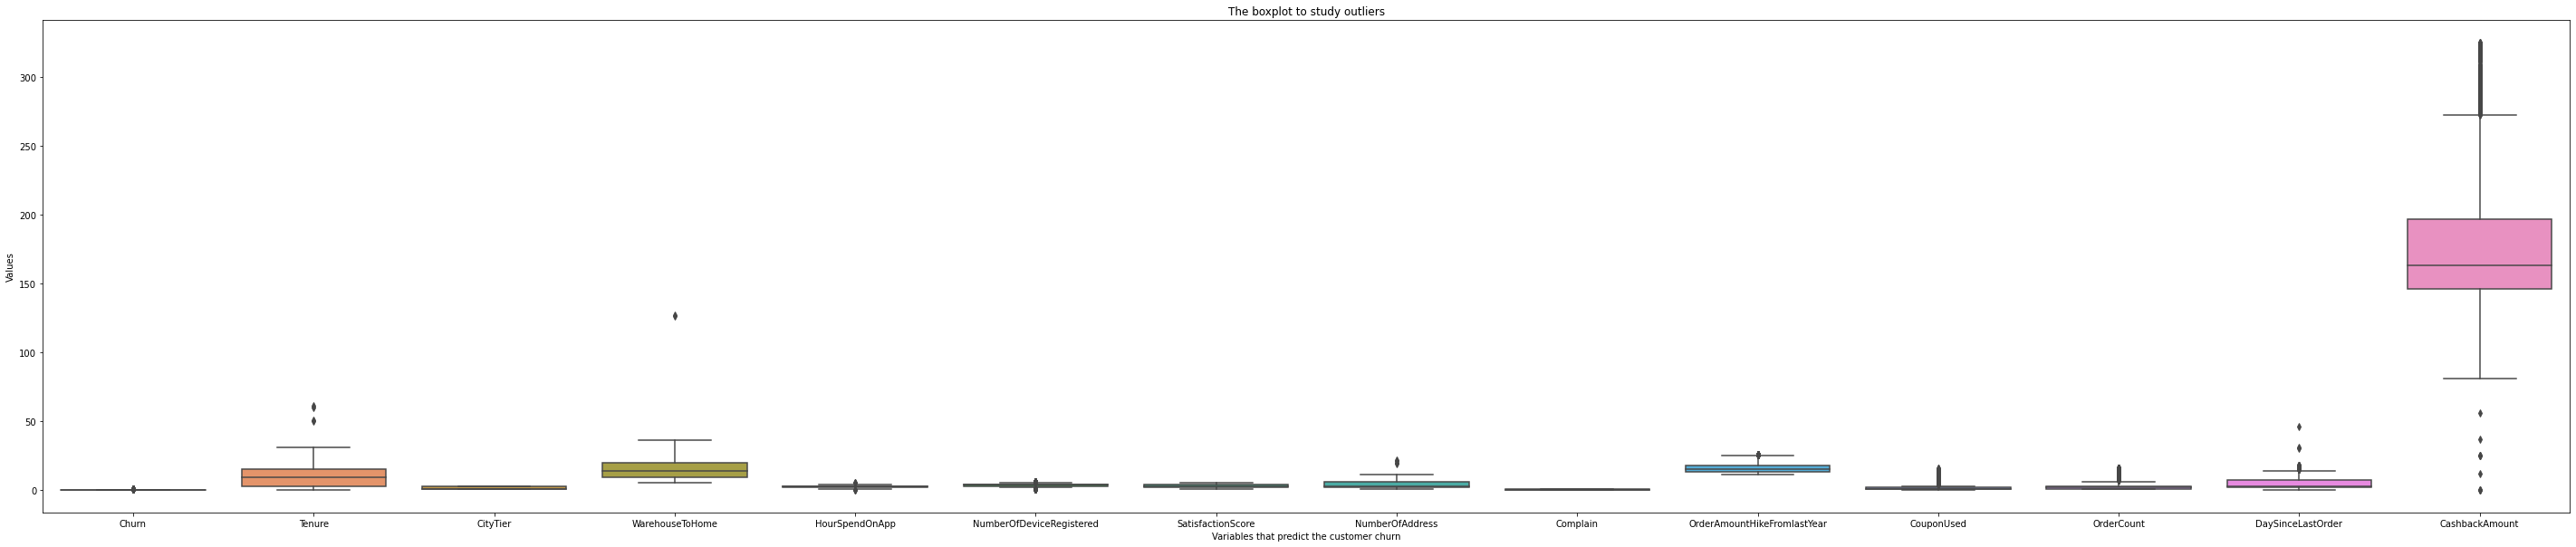

In [17]:
plt.figure(figsize=(50,10))
sns.boxplot(data=df)
plt.title('The boxplot to study outliers')
plt.xlabel('Variables that predict the customer churn')
plt.ylabel('Values')

Here we can see that there are quite a lot of outliers in almost all of the variables. Lets treat these outliers

In [18]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    return lr, ur

In [19]:
df.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [20]:
for column in df.columns:
    if df[column].dtype != 'object': 
        lr,ur=remove_outlier(df[column])
        df[column]=np.where(df[column]>ur,ur,df[column])
        df[column]=np.where(df[column]<lr,lr,df[column])

Text(0, 0.5, 'Values')

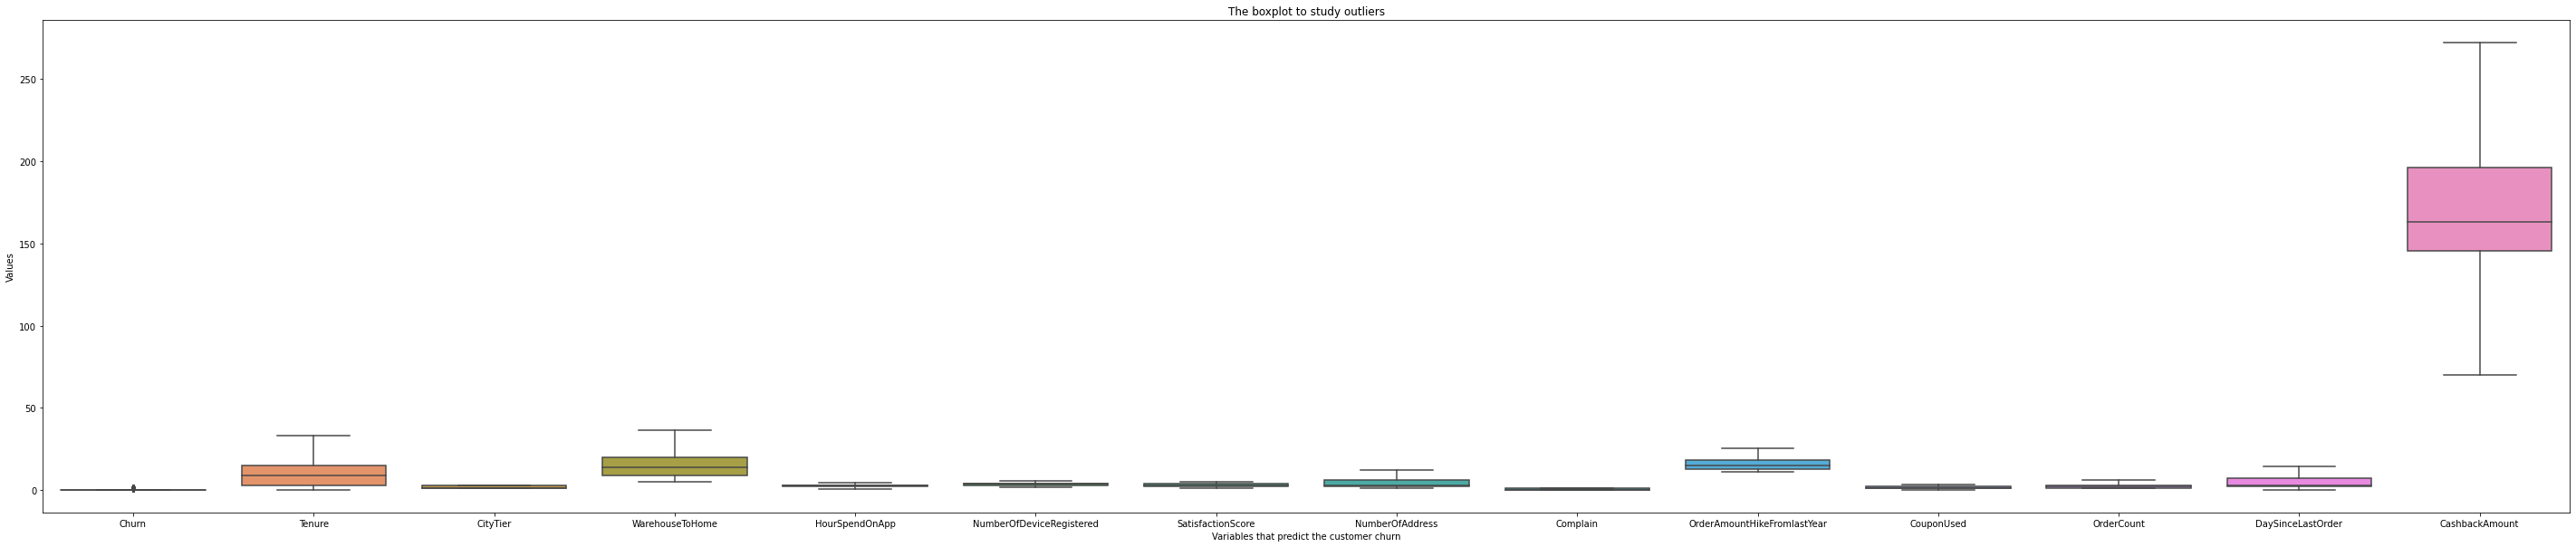

In [21]:
plt.figure(figsize=(50,10))
sns.boxplot(data=df)
plt.title('The boxplot to study outliers')
plt.xlabel('Variables that predict the customer churn')
plt.ylabel('Values')

Here we can see that we have treated all the outliers. The outliers are now replaced with their corresponding upper range or lower range values

# Feature Engineering - Adding new variables

Lets caurve out a new variable -> Average Cashback per order

In [22]:
df['avg_cashbk_per_order'] = df['CashbackAmount'] / df['OrderCount']

In [23]:
# Percentage of customer churn
Churn_perc = round((df['Churn'][df['Churn']==1].count()*100/df['Churn'][df['Churn']==0].count()),2)

In [24]:
print('The average customer churn is:', Churn_perc,'%')

The average customer churn is: 20.25 %


# Exploratory Data Analysis

# 1. The Univariate Analysis

Lets make a list of the categorical and numerical variables these will be helpful in analysing the data efficiently

In [25]:
cat=[]
num=[]
for i in df.columns:
  if df[i].dtype=='object':
    cat.append(i)
  else:
    num.append(i)
print('cat = ',cat)
print('num = ',num)

cat =  ['Churn', 'PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
num =  ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount', 'avg_cashbk_per_order']


In [26]:
df[cat].describe().T

,count,unique,top,freq
Churn,5630,2,0,4682
PreferredLoginDevice,5630,3,Mobile Phone,2765
CityTier,5630,3,1,3666
PreferredPaymentMode,5630,7,Debit Card,2314
Gender,5630,2,Male,3384
PreferedOrderCat,5630,6,Laptop & Accessory,2050
MaritalStatus,5630,3,Married,2986


In [27]:
for i in cat:
    print(i)
    print()
    print(df[i].value_counts())
    print()
    print()

Churn

0    4682
1     948
Name: Churn, dtype: int64


PreferredLoginDevice

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64


CityTier

1    3666
3    1722
2     242
Name: CityTier, dtype: int64


PreferredPaymentMode

Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64


Gender

Male      3384
Female    2246
Name: Gender, dtype: int64


PreferedOrderCat

Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64


MaritalStatus

Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64




In [28]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,5630.0,10.118117,8.291334,0.000000,3.000000,9.00,15.0000,33.00000
WarehouseToHome,5630.0,15.534813,8.089328,5.000000,9.000000,14.00,20.0000,36.50000
HourSpendOnApp,5630.0,2.934636,0.703826,0.500000,2.000000,3.00,3.0000,4.50000
NumberOfDeviceRegistered,5630.0,3.695471,0.942015,1.500000,3.000000,4.00,4.0000,5.50000
SatisfactionScore,5630.0,3.066785,1.380194,1.000000,2.000000,3.00,4.0000,5.00000
NumberOfAddress,5630.0,4.207993,2.555111,1.000000,2.000000,3.00,6.0000,12.00000
Complain,5630.0,0.284902,0.451408,0.000000,0.000000,0.00,1.0000,1.00000
OrderAmountHikeFromlastYear,5630.0,15.671670,3.582823,11.000000,13.000000,15.00,18.0000,25.50000
CouponUsed,5630.0,1.440409,1.071295,0.000000,1.000000,1.00,2.0000,3.50000
OrderCount,5630.0,2.520604,1.711109,1.000000,1.000000,2.00,3.0000,6.00000


array([[<AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'WarehouseToHome'}>,
        <AxesSubplot:title={'center':'HourSpendOnApp'}>,
        <AxesSubplot:title={'center':'NumberOfDeviceRegistered'}>],
       [<AxesSubplot:title={'center':'SatisfactionScore'}>,
        <AxesSubplot:title={'center':'NumberOfAddress'}>,
        <AxesSubplot:title={'center':'Complain'}>,
        <AxesSubplot:title={'center':'OrderAmountHikeFromlastYear'}>],
       [<AxesSubplot:title={'center':'CouponUsed'}>,
        <AxesSubplot:title={'center':'OrderCount'}>,
        <AxesSubplot:title={'center':'DaySinceLastOrder'}>,
        <AxesSubplot:title={'center':'CashbackAmount'}>],
       [<AxesSubplot:title={'center':'avg_cashbk_per_order'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

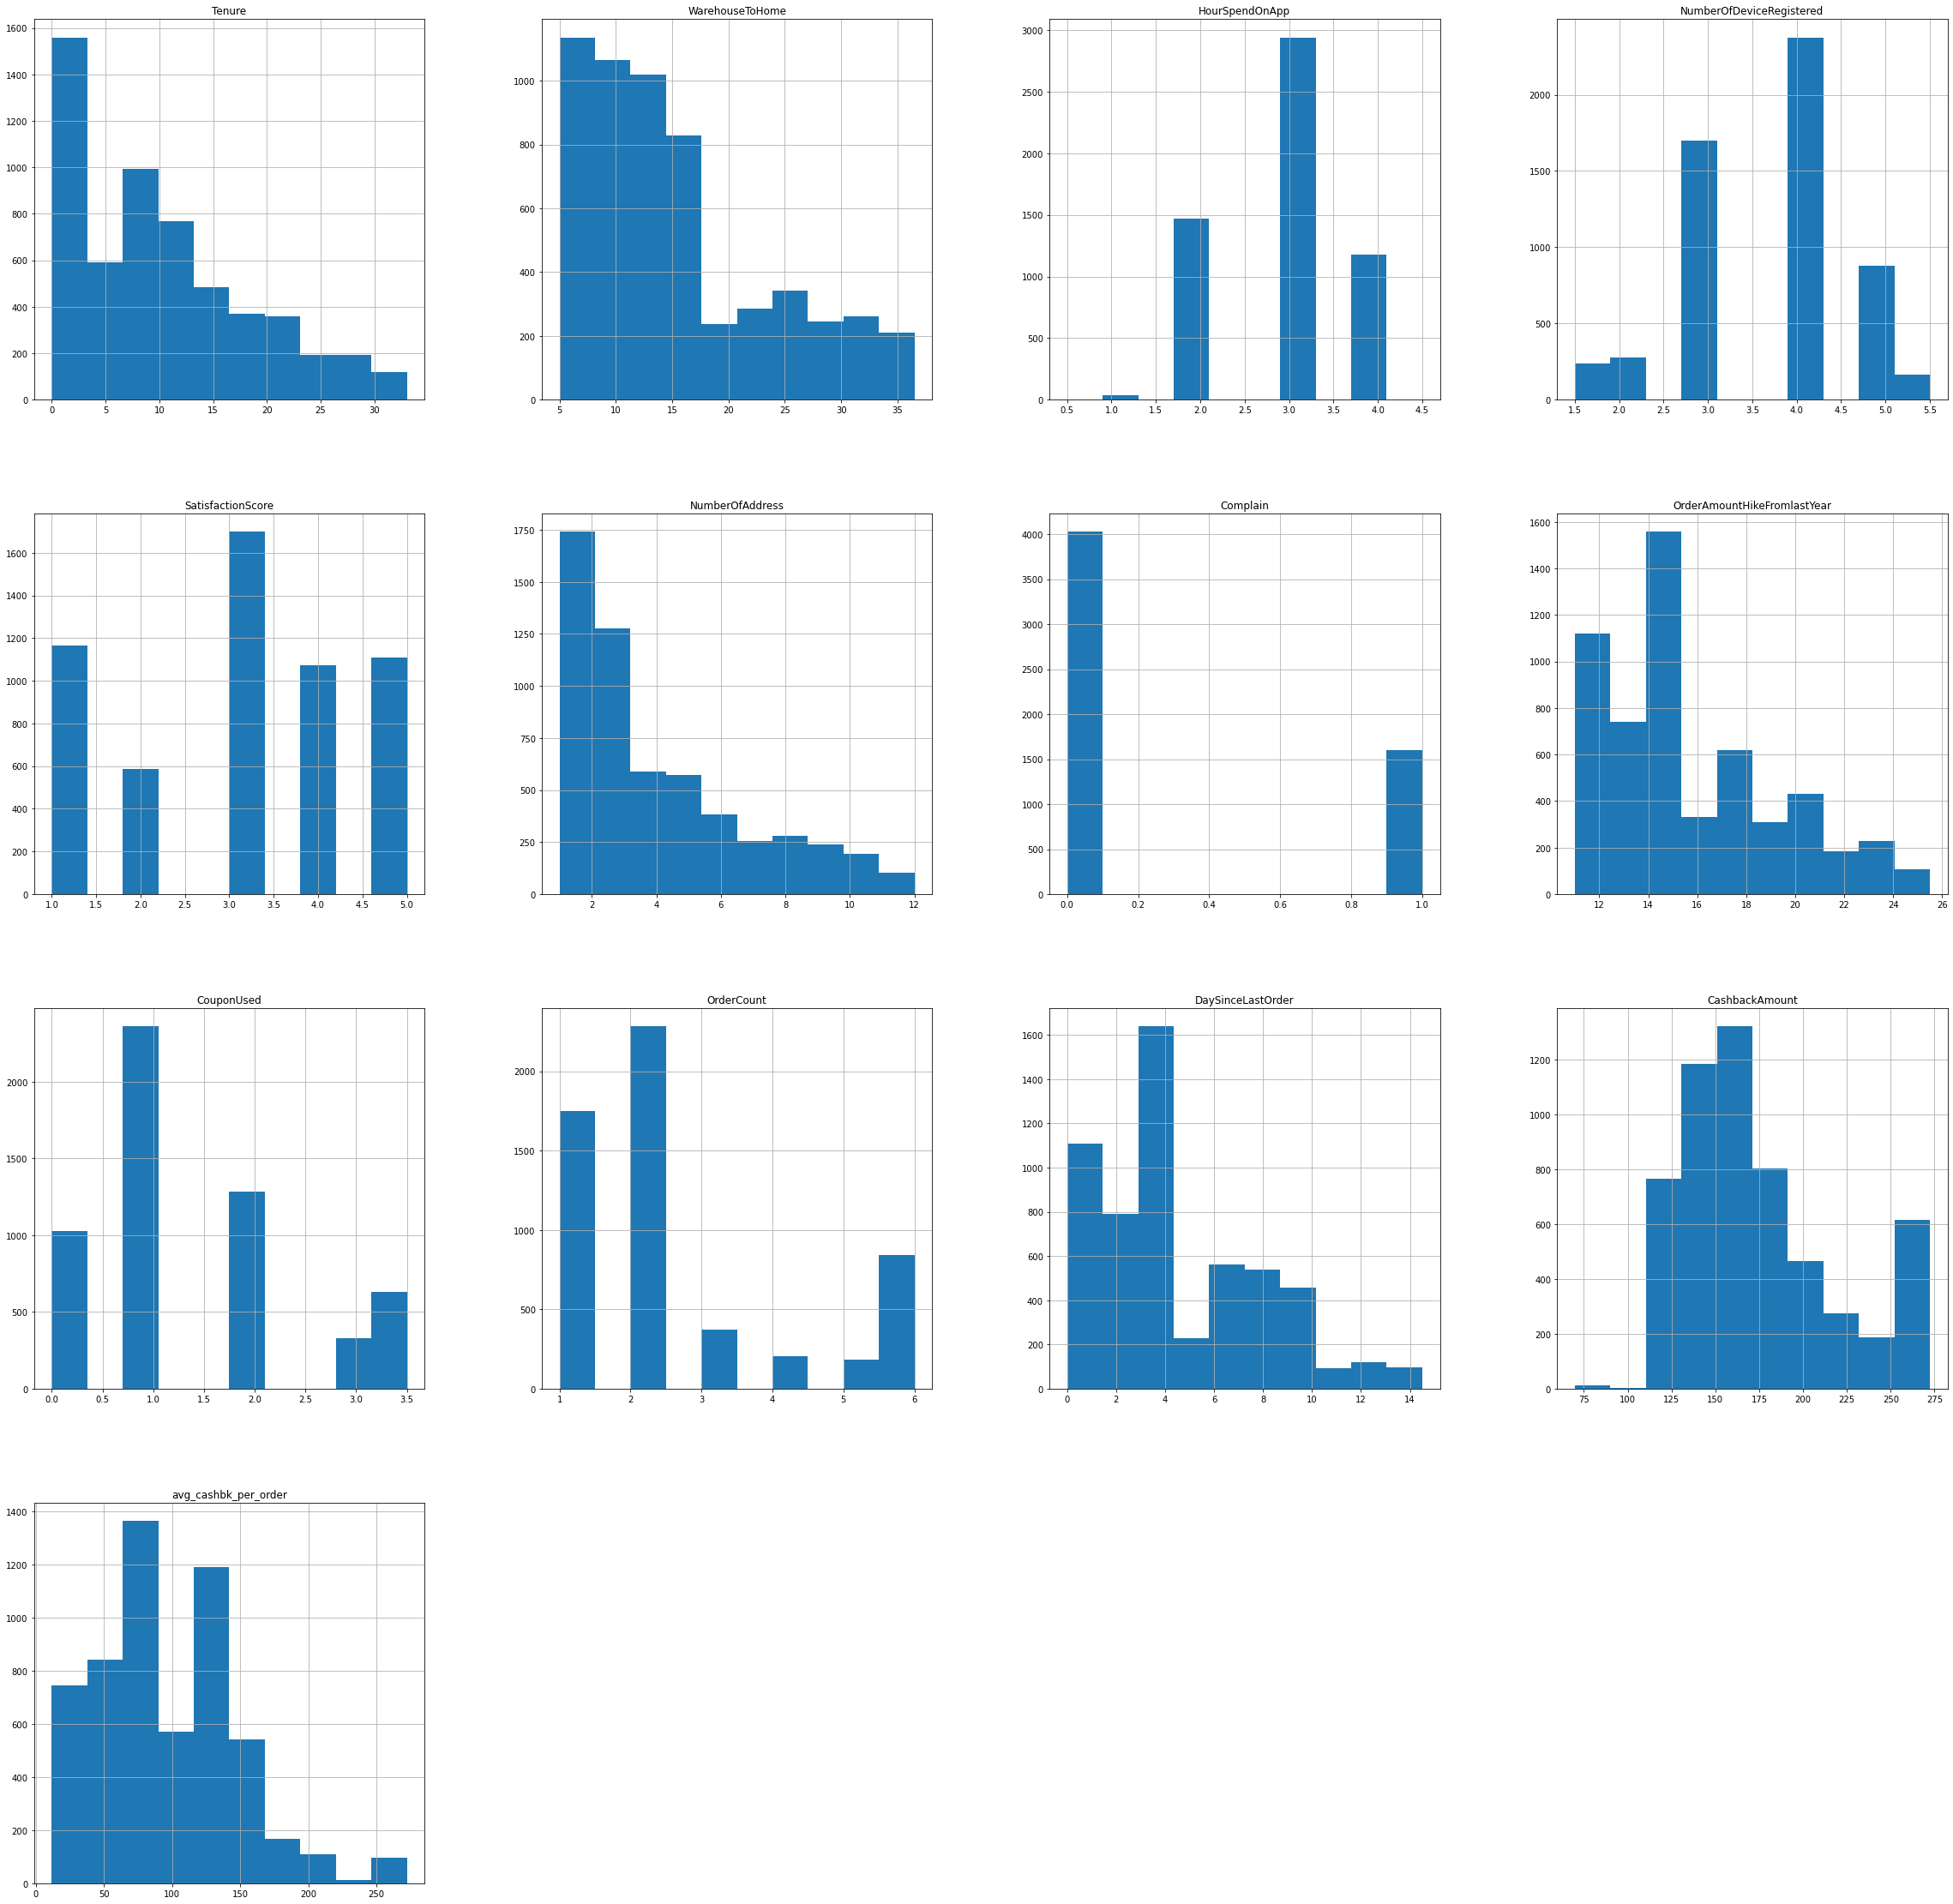

In [29]:
df[num].hist(figsize=(40,40))

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

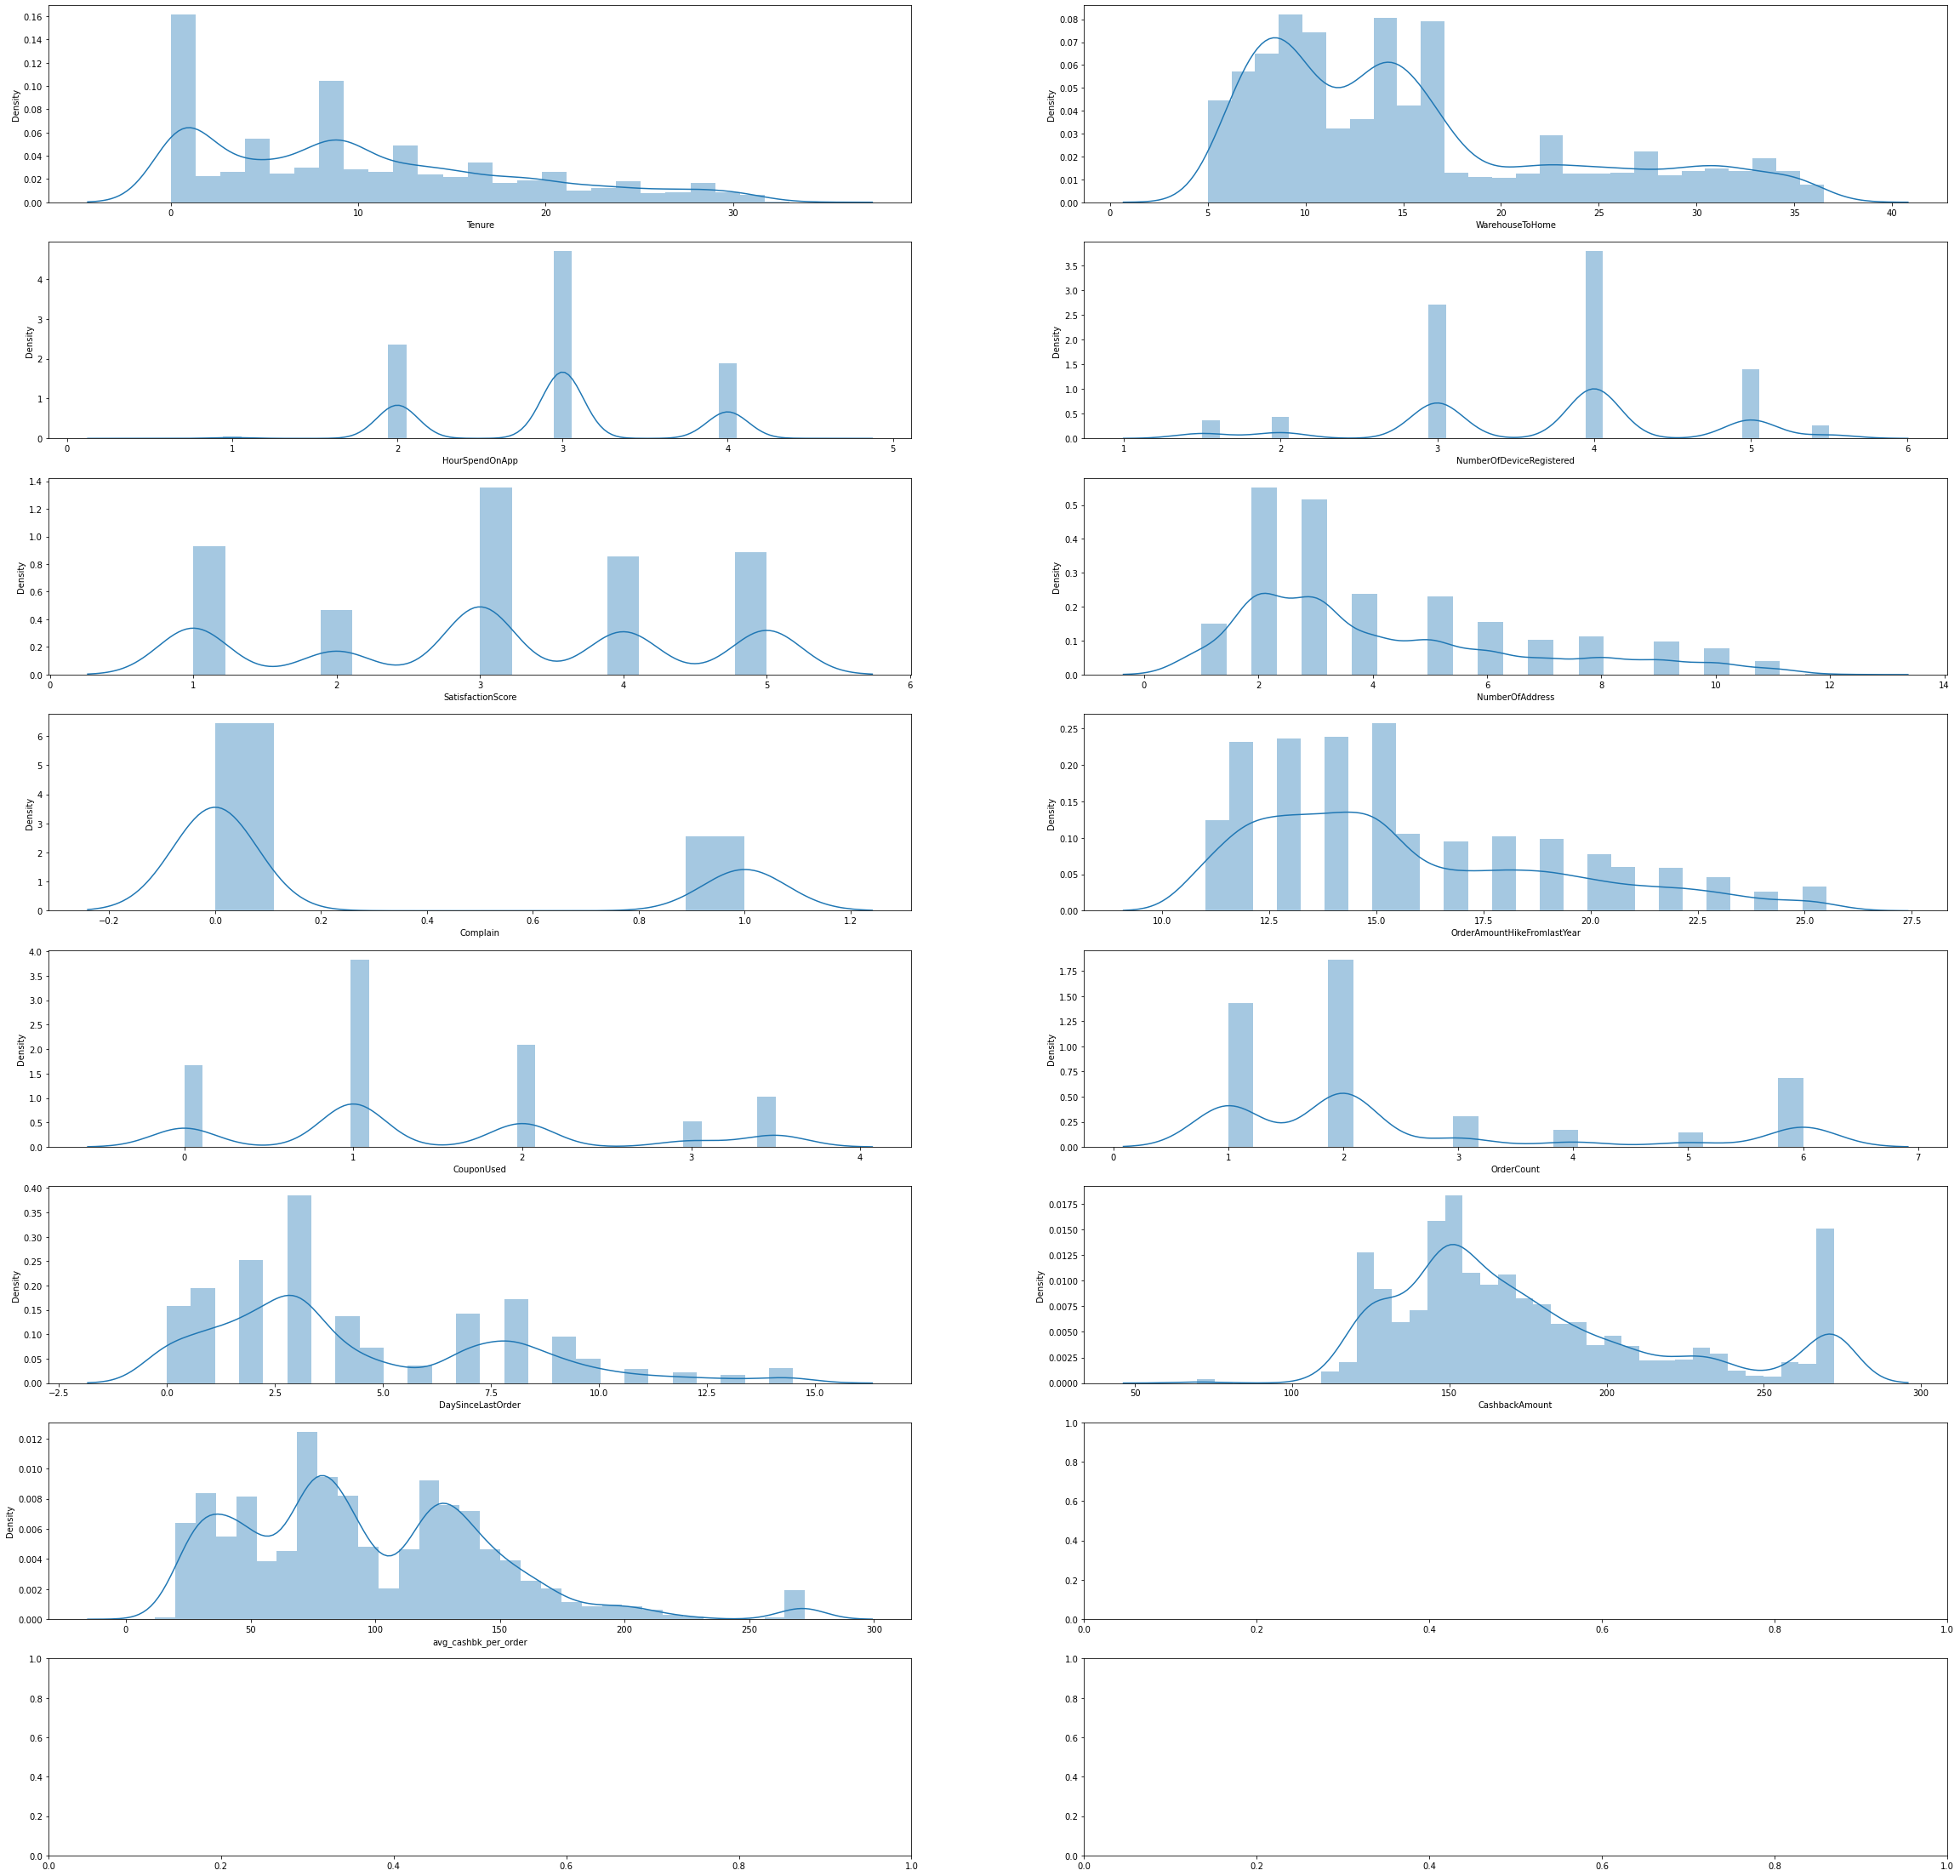

In [30]:
fig, ax = plt.subplots(8, 2, figsize=(40, 40))
for i, subplot in zip(num, ax.flatten()):
    sns.distplot(df[i], ax=subplot)

# EDA - Univariate Analysis - Analysing Churn by each Variable

In [31]:
# defining a tuple for storing the dataframes in a containing information about the contribution each value to the customer churn.
# this was done so that we can quickly automate making such dataframes

d={}

# running loop for storing the calculating and storing the values in the relevant dataframes  
for i in df.columns:
    d[i] = pd.concat([df.groupby(i).Churn.sum(),df[i].value_counts(),round(df.groupby(i).Churn.sum()*100/df[i].value_counts(),2)], axis=1)
    d[i].reset_index(level=0,inplace=True)
    d[i] = d[i].rename(columns = {'index':i, 'Churn':'Customers_churned', i:'Total_Customers', 0:'perc_of_total_cust'}, )

In [32]:
for i in df.columns:
    print(i)
    print(d[i])
    print()

Churn
   Churn  Total_Customers  Total_Customers  Total_Customers
0      0                0             4682              0.0
1      1              948              948            100.0

Tenure
    Tenure  Customers_churned  Total_Customers  perc_of_total_cust
0      0.0                272              508               53.54
1      1.0                349              690               50.58
2      2.0                 14              167                8.38
3      3.0                 18              195                9.23
4      4.0                 20              203                9.85
5      5.0                 16              204                7.84
6      6.0                  8              183                4.37
7      7.0                 16              221                7.24
8      8.0                 16              263                6.08
9      9.0                 93              511               18.20
10    10.0                 14              213                6.57
11

# Analysing the Churn by each Variable - Visualising via Graphs



In [33]:
# Lets define a function drawing the graph

In [34]:
def analysis_chart(variable):
  # definig the plot for matplotlib
  plt.figure(figsize=(20,12))
  fig, ax = plt.subplots()
  # defining the title
  title1 = 'Customers Churn analysed by ' + variable
  plt.title(title1)
  # defining the lines for the y -axis
  line1 = ax.plot(d[variable][variable],d[variable]['Customers_churned'], color='lightskyblue', label = 'Customers churned')
  line2 = ax.plot(d[variable][variable],d[variable]['Total_Customers'], color='dodgerblue', label = 'Total Customers')
  # labelling the x -axis and y-axis
  plt.xlabel (variable)
  plt.ylabel ('No. of customers')
  # rotating the labels on the x-axis for better visualisation
  for tick in ax.get_xticklabels():
    tick.set_rotation(45)
  # defining another axis on the right side of the graph
  ax2=ax.twinx()
  # defining the line for the right side y -axis
  line3 = ax2.plot(d[variable][variable],d[variable]['perc_of_total_cust'], color='yellowgreen', label = 'Churn as Percent of total')
  y = 0*d[variable]['perc_of_total_cust']+20.25
  line4 = ax2.plot(d[variable][variable], y, color='orangered', label='Average customer Churn', linestyle='dashed')
  # labelling the right side y-axis
  plt.ylabel ('percentage of customers churned')
  # adding the three lines to show the legend on the right corner in a coherent place, not doing this will lead to overlapping of legends of lines belonging to left and right y axis
  lines = line1+line2+line3+line4
  labs = [l.get_label() for l in lines]
  ax.legend(lines, labs, bbox_to_anchor=(1.7, 1))
  # adding sns palette for better visualisation
  sns.despine(ax=ax, right=True, left=True)
  sns.despine(ax=ax2, left=True, right=False)


In [35]:
col = ['Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder']

<Figure size 1440x864 with 0 Axes>

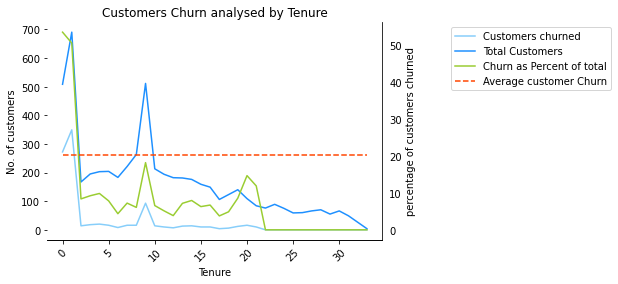

In [36]:
analysis_chart('Tenure')

<Figure size 1440x864 with 0 Axes>

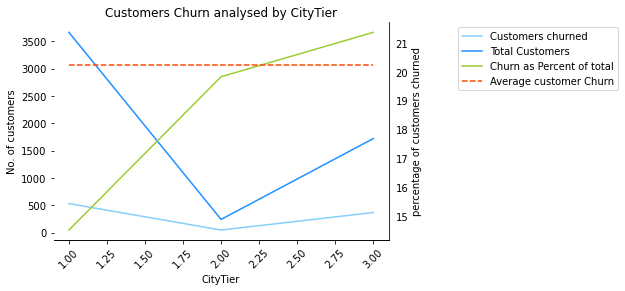

In [37]:
analysis_chart('CityTier')

<Figure size 1440x864 with 0 Axes>

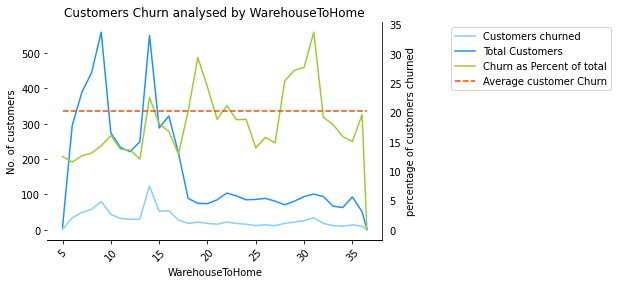

In [38]:
analysis_chart('WarehouseToHome')

<Figure size 1440x864 with 0 Axes>

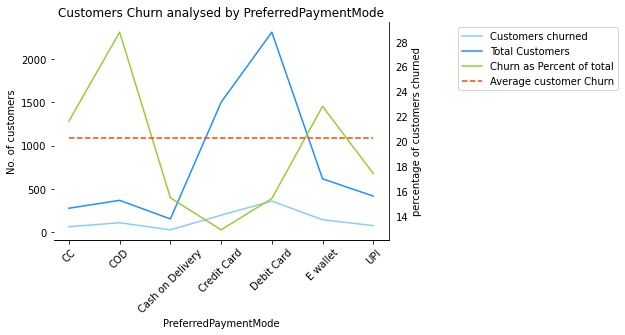

In [39]:
analysis_chart('PreferredPaymentMode')

<Figure size 1440x864 with 0 Axes>

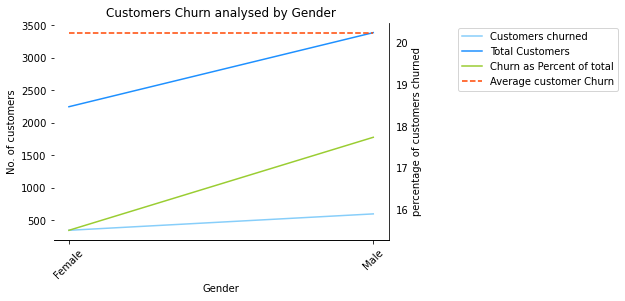

In [40]:
analysis_chart('Gender')

<Figure size 1440x864 with 0 Axes>

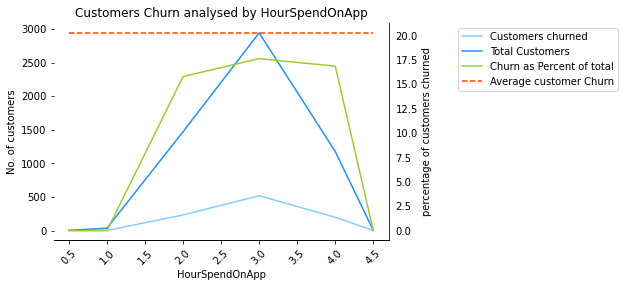

In [41]:
analysis_chart('HourSpendOnApp')

<Figure size 1440x864 with 0 Axes>

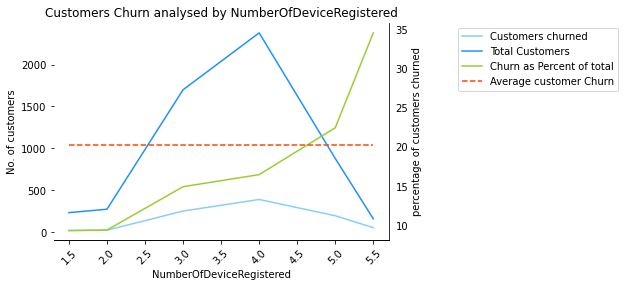

In [42]:
analysis_chart('NumberOfDeviceRegistered')

<Figure size 1440x864 with 0 Axes>

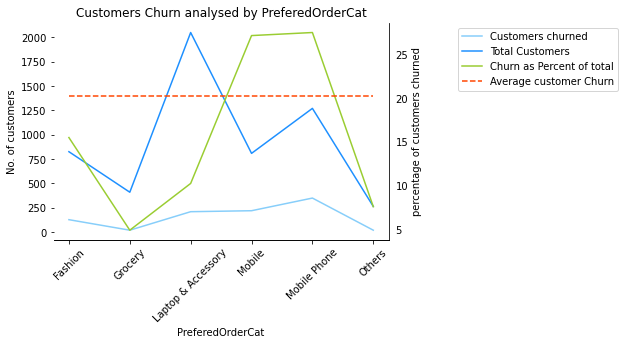

In [43]:
analysis_chart('PreferedOrderCat')

<Figure size 1440x864 with 0 Axes>

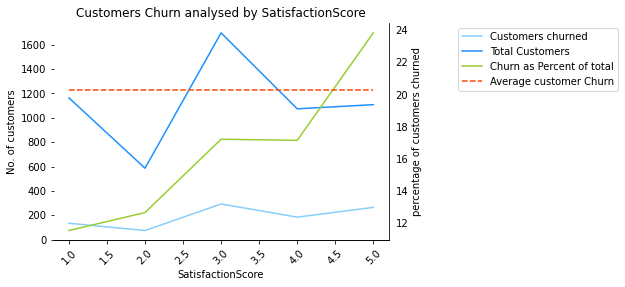

In [44]:
analysis_chart('SatisfactionScore')

<Figure size 1440x864 with 0 Axes>

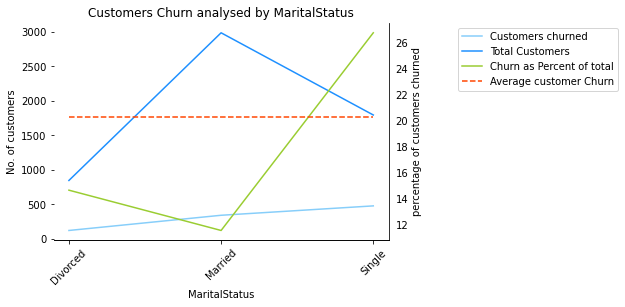

In [45]:
analysis_chart('MaritalStatus')

<Figure size 1440x864 with 0 Axes>

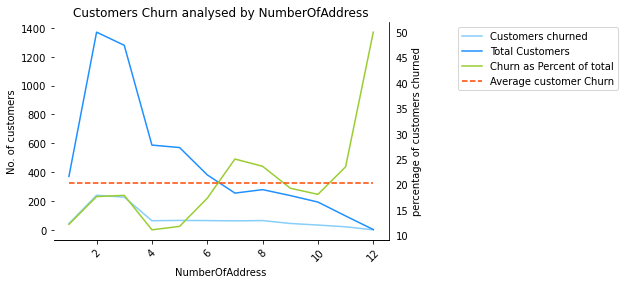

In [46]:
analysis_chart('NumberOfAddress')

<Figure size 1440x864 with 0 Axes>

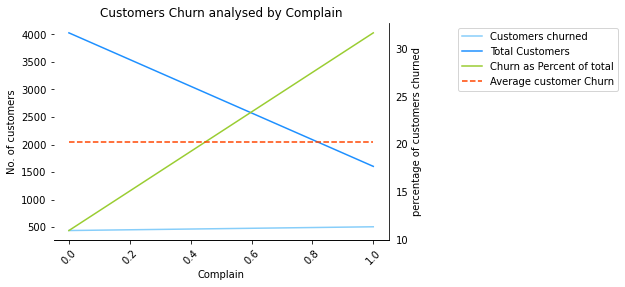

In [47]:
analysis_chart('Complain')

<Figure size 1440x864 with 0 Axes>

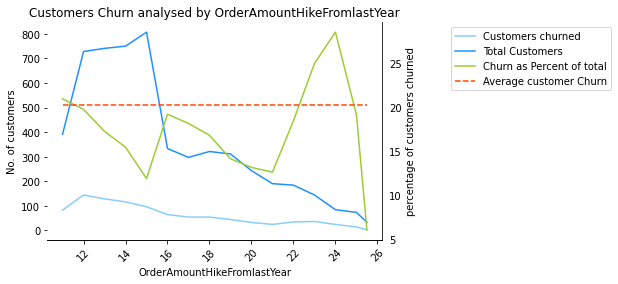

In [48]:
analysis_chart('OrderAmountHikeFromlastYear')

<Figure size 1440x864 with 0 Axes>

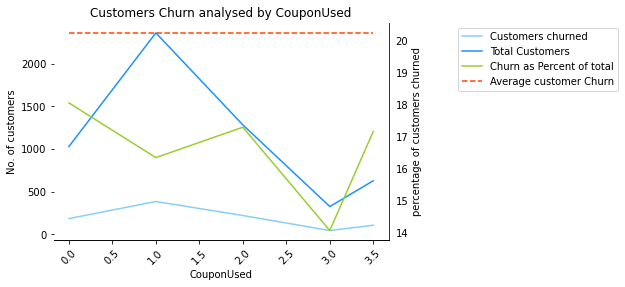

In [49]:
analysis_chart('CouponUsed')

<Figure size 1440x864 with 0 Axes>

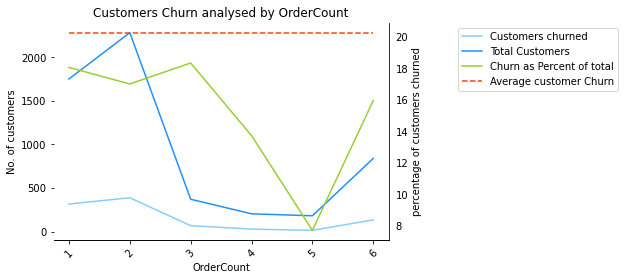

In [50]:
analysis_chart('OrderCount')

<Figure size 1440x864 with 0 Axes>

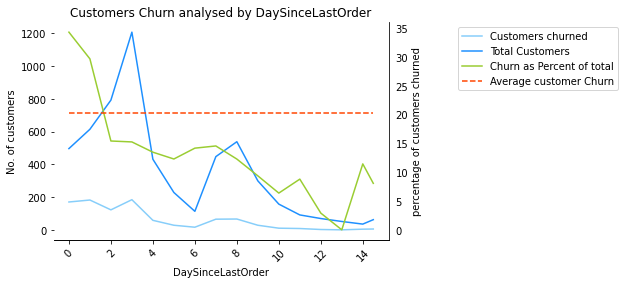

In [51]:
analysis_chart('DaySinceLastOrder')

<Figure size 1440x864 with 0 Axes>

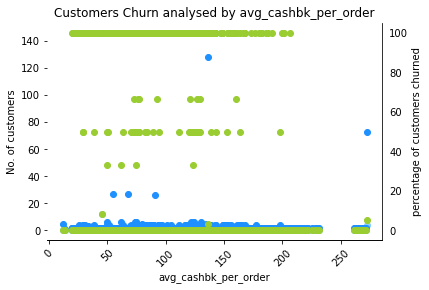

In [52]:
# writing the loop for automating the figure generation
# Writing the loop for one dataframe at a time since we need to have the figures in separate cells so that it becomes easy to analyse and write the conclusion there only.
for i in ['avg_cashbk_per_order']:
    # definig the plot for matplotlib
    plt.figure(figsize=(20,12))
    fig, ax = plt.subplots()
    # defining the title
    title1 = 'Customers Churn analysed by ' + i
    plt.title(title1)
    # defining the lines for the y -axis
    line1 = ax.scatter(d[i][i],d[i]['Customers_churned'], color='lightskyblue', label = 'Customers churned')
    line2 = ax.scatter(d[i][i],d[i]['Total_Customers'], color='dodgerblue', label = 'Total Customers')
    # labelling the x -axis and y-axis
    plt.xlabel (i)
    plt.ylabel ('No. of customers')
    # rotating the labels on the x-axis for better visualisation
    for tick in ax.get_xticklabels():
      tick.set_rotation(45)
    # defining another axis on the right side of the graph
    ax2=ax.twinx()
    # defining the line for the right side y -axis
    line3 = ax2.scatter(d[i][i],d[i]['perc_of_total_cust'], color='yellowgreen', label = 'Churn as Percent of total')
    # labelling the right side y-axis
    plt.ylabel ('percentage of customers churned')
    # adding sns palette for better visualisation
    sns.despine(ax=ax, right=True, left=True)
    sns.despine(ax=ax2, left=True, right=False)

# EDA - Bivariate Analysis

<AxesSubplot:>

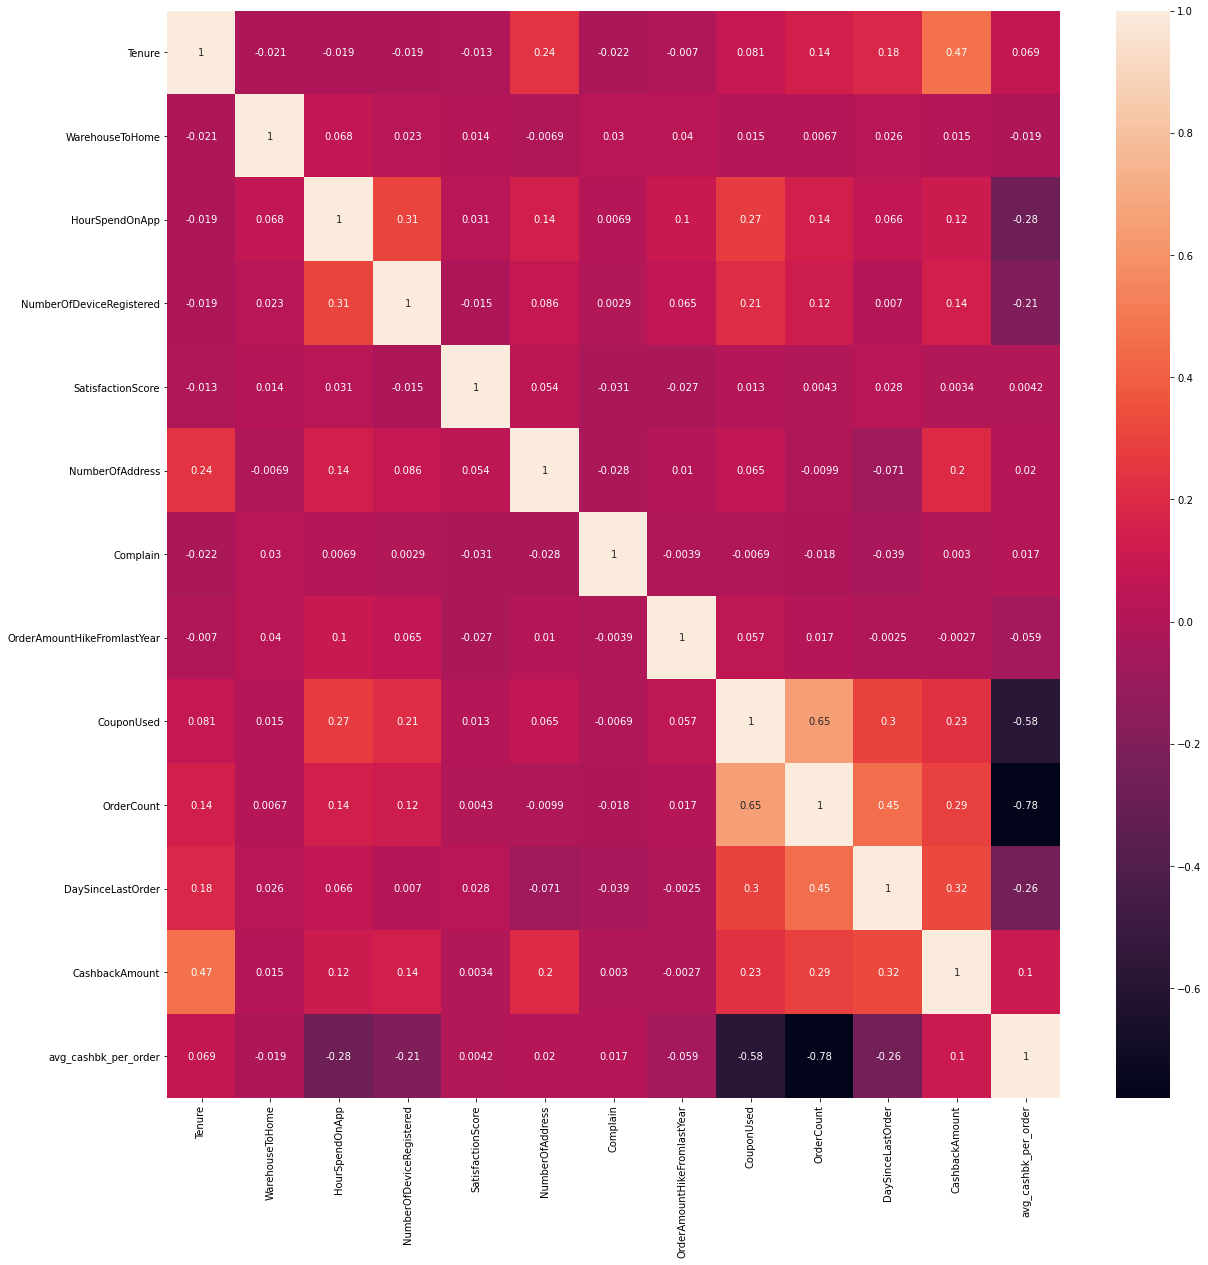

In [53]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

# One Hot coding and Scaling of the data

## One hot encoding

In [54]:
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,avg_cashbk_per_order
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3.0,Laptop & Accessory,2.0,Single,9.0,1.0,11.0,1.0,1.0,5.0,159.93,159.93
1,1,9.0,Phone,1,8.0,UPI,Male,3.0,4.0,Mobile,3.0,Single,7.0,1.0,15.0,0.0,1.0,0.0,120.90,120.90
2,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4.0,Mobile,3.0,Single,6.0,1.0,14.0,0.0,1.0,3.0,120.28,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4.0,Laptop & Accessory,5.0,Single,8.0,0.0,23.0,0.0,1.0,3.0,134.07,134.07
4,1,0.0,Phone,1,12.0,CC,Male,3.0,3.0,Mobile,5.0,Single,3.0,0.0,11.0,1.0,1.0,3.0,129.60,129.60


In [55]:
df_encoded=df.copy()
df_encoded.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,avg_cashbk_per_order
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3.0,Laptop & Accessory,2.0,Single,9.0,1.0,11.0,1.0,1.0,5.0,159.93,159.93
1,1,9.0,Phone,1,8.0,UPI,Male,3.0,4.0,Mobile,3.0,Single,7.0,1.0,15.0,0.0,1.0,0.0,120.90,120.90
2,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4.0,Mobile,3.0,Single,6.0,1.0,14.0,0.0,1.0,3.0,120.28,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4.0,Laptop & Accessory,5.0,Single,8.0,0.0,23.0,0.0,1.0,3.0,134.07,134.07
4,1,0.0,Phone,1,12.0,CC,Male,3.0,3.0,Mobile,5.0,Single,3.0,0.0,11.0,1.0,1.0,3.0,129.60,129.60


In [56]:
df_encoded = pd.get_dummies(df_encoded,drop_first=True)

In [57]:
df_encoded.head(10)

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,4.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,1
1,9.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,0.0,1.0,...,0,1,1,0,0,1,0,0,0,1
2,9.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,0.0,1.0,...,0,0,1,0,0,1,0,0,0,1
3,0.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,0.0,1.0,...,0,0,1,0,1,0,0,0,0,1
4,0.0,12.0,3.0,3.0,5.0,3.0,0.0,11.0,1.0,1.0,...,0,0,1,0,0,1,0,0,0,1
5,0.0,22.0,3.0,5.0,5.0,2.0,1.0,22.0,3.5,6.0,...,0,0,0,0,0,0,1,0,0,1
6,9.0,11.0,2.0,3.0,2.0,4.0,0.0,14.0,0.0,1.0,...,0,0,1,0,1,0,0,0,0,0
7,9.0,6.0,3.0,3.0,2.0,3.0,1.0,16.0,2.0,2.0,...,0,0,1,0,0,1,0,0,0,0
8,13.0,9.0,3.0,4.0,3.0,2.0,1.0,14.0,0.0,1.0,...,1,0,1,0,0,1,0,0,0,0
9,9.0,31.0,2.0,5.0,3.0,2.0,0.0,12.0,1.0,1.0,...,0,0,1,0,0,1,0,0,0,1


###Scaling the data

In [58]:
#importing StandardScaler from SciKit Learn
from sklearn.preprocessing import StandardScaler

In [59]:
#defining a function standard scaler that will scale the the dataframe
scaler = StandardScaler()

In [60]:
features = df_encoded[num]
features = scaler.fit_transform(features)

In [61]:
scaled_df_encoded = df_encoded.copy()

In [62]:
scaled_df_encoded[num] = features

In [63]:
#checking the how does the scaled df looks like
scaled_df_encoded

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,-0.737959,-1.178795,0.092878,-0.738345,-0.772992,1.875626,1.584290,-1.304023,-0.411136,-0.888745,...,0,0,0,0,1,0,0,0,0,1
1,-0.134866,-0.931534,0.092878,0.323303,-0.048392,1.092812,1.584290,-0.187486,-1.344668,-0.888745,...,0,1,1,0,0,1,0,0,0,1
2,-0.134866,1.788340,-1.328053,0.323303,-0.048392,0.701405,1.584290,-0.466620,-1.344668,-0.888745,...,0,0,1,0,0,1,0,0,0,1
3,-1.220433,-0.066119,-1.328053,0.323303,1.400807,1.484219,-0.631198,2.045589,-1.344668,-0.888745,...,0,0,1,0,1,0,0,0,0,1
4,-1.220433,-0.437011,0.092878,-0.738345,1.400807,-0.472817,-0.631198,-1.304023,-0.411136,-0.888745,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,-0.014247,1.788340,0.092878,-1.799993,-1.497592,0.701405,-0.631198,0.649917,-0.411136,-0.304276,...,0,0,1,0,1,0,0,0,1,0
5626,0.347609,-0.313381,0.092878,1.384951,1.400807,0.701405,-0.631198,0.091648,-0.411136,-0.304276,...,0,0,1,0,0,0,0,0,1,0
5627,-1.099814,-0.560642,0.092878,-1.799993,0.676207,-0.472817,1.584290,1.487320,-0.411136,-0.304276,...,0,0,1,0,1,0,0,0,1,0
5628,1.553794,-0.807903,1.513809,1.384951,0.676207,-0.081410,-0.631198,-0.187486,0.522397,-0.304276,...,0,0,1,0,1,0,0,0,1,0


# Hierarchical Clustering

In [64]:
scaled_df_encoded_h = scaled_df_encoded.copy()

### Creating the Dendrogram - Importing dendrogram and linkage module

importing libraries - dendogram and linkage

In [65]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [66]:
#linking using the average linking method
link_method=linkage(scaled_df_encoded_h,method = 'average')

In [67]:
# just checking what do we get in the Link_method variable
link_method

array([[1.00000000e+00, 1.34700000e+03, 0.00000000e+00, 2.00000000e+00],
       [2.00000000e+00, 1.35900000e+03, 0.00000000e+00, 2.00000000e+00],
       [1.10000000e+01, 1.39500000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [1.12530000e+04, 1.12540000e+04, 6.13078020e+00, 5.53000000e+03],
       [1.12550000e+04, 1.12560000e+04, 6.23700127e+00, 5.62600000e+03],
       [1.04360000e+04, 1.12570000e+04, 6.61935699e+00, 5.63000000e+03]])

selecting the target variable or label

In [68]:
labellist = np.array(scaled_df_encoded_h.Churn_1)
labellist

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

In [69]:
len(labellist)

5630

creating the dendrogram

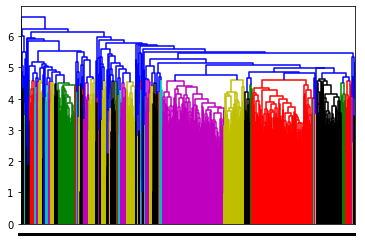

In [70]:
dend = dendrogram(link_method,labels=labellist)

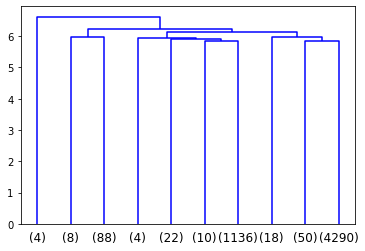

In [71]:
# truncate mode = lastp means last 10 dendrograms to stay and rest to go.
dend = dendrogram(link_method,
                  labels=labellist,
                 truncate_mode='lastp',
                 p=10)

### importing fcluster to create clusters

In [72]:
from scipy.cluster.hierarchy import fcluster

In [73]:
# criterion= maxclust, clusters=4 
clusters_max = fcluster(link_method,4,criterion = 'maxclust')
clusters_max

array([4, 4, 4, ..., 4, 4, 4], dtype=int32)

In [74]:
#appending the clusters to the dataframe
scaled_df_encoded_h['clusters_max'] = clusters_max

In [75]:
scaled_df_encoded_h.head()

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,clusters_max
0,-0.737959,-1.178795,0.092878,-0.738345,-0.772992,1.875626,1.584290,-1.304023,-0.411136,-0.888745,...,0,0,0,1,0,0,0,0,1,4
1,-0.134866,-0.931534,0.092878,0.323303,-0.048392,1.092812,1.584290,-0.187486,-1.344668,-0.888745,...,1,1,0,0,1,0,0,0,1,4
2,-0.134866,1.788340,-1.328053,0.323303,-0.048392,0.701405,1.584290,-0.466620,-1.344668,-0.888745,...,0,1,0,0,1,0,0,0,1,4
3,-1.220433,-0.066119,-1.328053,0.323303,1.400807,1.484219,-0.631198,2.045589,-1.344668,-0.888745,...,0,1,0,1,0,0,0,0,1,4
4,-1.220433,-0.437011,0.092878,-0.738345,1.400807,-0.472817,-0.631198,-1.304023,-0.411136,-0.888745,...,0,1,0,0,1,0,0,0,1,4


In [76]:
df_h = df.copy()

In [77]:
df_h['clusters_max'] = clusters_max

### Cluster Profiles

In [78]:
aggdata_max = scaled_df_encoded_h.iloc[:,:].groupby('clusters_max').median()
aggdata_max['freq'] = scaled_df_encoded_h.clusters_max.value_counts().sort_index()
aggdata_max
# 4 clusters in the maxcluster method

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,freq
clusters_max,,,,,,,,,,,,,,,,,,,,,
1,-0.195175,-0.869718,0.803344,1.650363,0.676207,-0.277114,1.584290,-0.047919,-0.411136,-0.596511,...,0,0,0,0,0,0,1,0,1,4
2,1.553794,1.911971,0.092878,-0.738345,-0.772992,-0.081410,1.584290,0.091648,-0.411136,-0.304276,...,0,1,1,0,0,0,0,1,0,96
3,0.106371,-0.313381,0.092878,0.323303,-0.048392,-0.472817,-0.631198,-0.187486,1.455929,2.033597,...,0,1,0,0,0,0,0,1,0,1172
4,-0.255484,-0.189750,0.092878,0.323303,-0.048392,-0.472817,-0.631198,-0.187486,-0.411136,-0.304276,...,0,1,0,0,0,0,0,1,0,4358


In [79]:
aggdata_max_2 = df_h.iloc[:,:].groupby('clusters_max').mean()
aggdata_max_2['freq'] = df_h.clusters_max.value_counts().sort_index()
aggdata_max_2

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,avg_cashbk_per_order,freq
clusters_max,,,,,,,,,,,,,,
1,8.500000,8.500000,3.500000,5.250000,4.000000,3.500000,1.000000,15.50000,1.250000,1.500000,11.500000,272.326250,204.244688,4
2,21.041667,30.208333,2.958333,3.276042,2.312500,3.958333,0.687500,16.62500,1.510417,2.656250,8.395833,232.486263,105.839287,96
3,11.938567,15.106655,2.917235,3.700512,3.059727,3.751706,0.242321,15.62116,2.563993,5.489761,7.363481,192.997217,36.283174,1172
4,9.389399,15.333180,2.938274,3.701927,3.084442,4.336852,0.286829,15.66441,1.136875,1.720055,3.546122,169.223195,112.124791,4358


# K means Clustering

In [80]:
scaled_df_encoded_k= scaled_df_encoded.copy()

### Importing the KMeans from sklearn

In [81]:
from sklearn.cluster import KMeans 

In [82]:
k_means = KMeans(n_clusters = 2)

In [83]:
k_means.fit(scaled_df_encoded_k)

KMeans(n_clusters=2)

In [84]:
k_means.labels_

array([0, 0, 0, ..., 0, 1, 0], dtype=int32)

In [85]:
k_means.inertia_

77898.75569906038

In [86]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df_encoded_k)
k_means.inertia_

71780.44609274015

In [87]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df_encoded_k)
k_means.inertia_

67757.64816471095

In [88]:
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_df_encoded_k)
k_means.inertia_

65583.76760362892

In [89]:
wss =[] 
for i in range(1,20):
    k_means = KMeans(n_clusters=i)
    k_means.fit(scaled_df_encoded_k)
    wss.append(k_means.inertia_)

In [90]:
wss

[89242.39982238055,
 77898.75569906038,
 71780.44609274015,
 67757.64344625502,
 65583.76760362892,
 63885.00625356133,
 62104.61214246263,
 60760.1576264467,
 59772.02936480367,
 58349.344458001106,
 57437.84488600065,
 56695.338524161336,
 55909.56538601998,
 55202.44547602852,
 54597.84361961554,
 53937.54813498816,
 53456.605557793555,
 53024.45760800121,
 52378.279069732554]

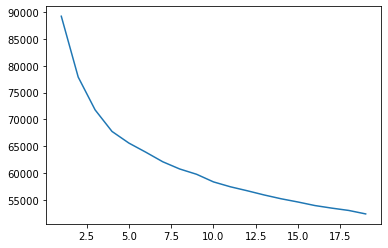

In [91]:
plt.plot(range(1,20), wss)

In [92]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [93]:
# Silhoutte score for 2 cluster
Sil_Score = []
for i in range(2,20):
  k_means = KMeans(n_clusters=i)
  k_means.fit(scaled_df_encoded_k)
  labels = k_means.labels_
  ss = silhouette_score(scaled_df_encoded_k,labels)
  Sil_Score.append(ss)

In [94]:
Sil_Score

[0.11635431391631353,
 0.10083186892312104,
 0.10140716663972098,
 0.09008079535042605,
 0.08604774079166724,
 0.0842844337401865,
 0.0812840408326692,
 0.0794931795997525,
 0.07286842703963363,
 0.07716026564791698,
 0.07549166356261139,
 0.06871256310939595,
 0.07152386085383922,
 0.0675851640775217,
 0.06404288710638183,
 0.06922397018328658,
 0.07116667631518447,
 0.0674359856010533]

In [95]:
# taking ideal number of clusters as 4
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df_encoded_k)
labels = k_means.labels_

In [96]:
scaled_df_encoded_k["Clus_kmeans"] = labels
scaled_df_encoded_k.head(10)

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,Clus_kmeans
0,-0.737959,-1.178795,0.092878,-0.738345,-0.772992,1.875626,1.584290,-1.304023,-0.411136,-0.888745,...,0,0,0,1,0,0,0,0,1,1
1,-0.134866,-0.931534,0.092878,0.323303,-0.048392,1.092812,1.584290,-0.187486,-1.344668,-0.888745,...,1,1,0,0,1,0,0,0,1,1
2,-0.134866,1.788340,-1.328053,0.323303,-0.048392,0.701405,1.584290,-0.466620,-1.344668,-0.888745,...,0,1,0,0,1,0,0,0,1,1
3,-1.220433,-0.066119,-1.328053,0.323303,1.400807,1.484219,-0.631198,2.045589,-1.344668,-0.888745,...,0,1,0,1,0,0,0,0,1,1
4,-1.220433,-0.437011,0.092878,-0.738345,1.400807,-0.472817,-0.631198,-1.304023,-0.411136,-0.888745,...,0,1,0,0,1,0,0,0,1,1
5,-1.220433,0.799295,0.092878,1.384951,1.400807,-0.864224,1.584290,1.766454,1.922695,2.033597,...,0,0,0,0,0,1,0,0,1,2
6,-0.134866,-0.560642,-1.328053,-0.738345,-0.772992,-0.081410,-0.631198,-0.466620,-1.344668,-0.888745,...,0,1,0,1,0,0,0,0,0,1
7,-0.134866,-1.178795,0.092878,-0.738345,-0.772992,-0.472817,1.584290,0.091648,0.522397,-0.304276,...,0,1,0,0,1,0,0,0,0,1
8,0.347609,-0.807903,0.092878,0.323303,-0.048392,-0.864224,1.584290,-0.466620,-1.344668,-0.888745,...,0,1,0,0,1,0,0,0,0,1
9,-0.134866,1.911971,-1.328053,1.384951,-0.048392,-0.864224,-0.631198,-1.024889,-0.411136,-0.888745,...,0,1,0,0,1,0,0,0,1,1


In [97]:
aggdata_k = scaled_df_encoded_k.iloc[:,:].groupby('Clus_kmeans').mean()
aggdata_k['freq'] = scaled_df_encoded_k.Clus_kmeans.value_counts().sort_index()
aggdata_k

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,freq
Clus_kmeans,,,,,,,,,,,,,,,,,,,,,
0,1.271416,0.021572,-0.149451,-0.051840,-0.011882,0.430352,0.084399,-0.120768,-0.119859,-0.308052,...,0.069767,0.547804,0.375969,0.093023,0.000000,0.003876,0.205426,0.576227,0.236434,774
1,-0.318871,-0.078838,-0.642658,-0.575236,-0.005908,-0.265852,-0.006964,-0.115732,-0.809483,-0.779276,...,0.078719,0.623779,0.001086,0.415309,0.385451,0.125407,0.000000,0.509772,0.353420,1842
2,0.208186,-0.010427,0.026788,0.008283,0.005282,-0.166029,-0.052995,-0.024718,1.143545,1.732049,...,0.068906,0.578811,0.100775,0.403962,0.058570,0.100775,0.090439,0.572782,0.260121,1161
3,-0.344532,0.075892,0.684485,0.588285,0.007526,0.188541,0.004873,0.180977,0.138253,-0.181895,...,0.072855,0.614679,0.000000,0.401511,0.016730,0.496492,0.000000,0.505127,0.356179,1853


In [98]:
df_k = df.copy()

In [99]:
df_k['Clus_kmeans'] = scaled_df_encoded_k["Clus_kmeans"]

In [100]:
aggdata_k2 = df_k.iloc[:,:].groupby('Clus_kmeans').mean()
aggdata_k2['freq'] = df_k.Clus_kmeans.value_counts().sort_index()
aggdata_k2

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,avg_cashbk_per_order,freq
Clus_kmeans,,,,,,,,,,,,,,
0,20.658915,15.709302,2.829457,3.646641,3.050388,5.307494,0.322997,15.239018,1.312016,1.993540,5.441860,242.181032,142.296474,774
1,7.474484,14.897123,2.482356,3.153637,3.058632,3.528773,0.281759,15.257058,0.573290,1.187296,2.850163,144.225895,131.845720,1842
2,11.844100,15.450474,2.953488,3.703273,3.074074,3.783807,0.260982,15.583118,2.665375,5.484065,7.664083,192.135011,36.431845,1161
3,7.261738,16.148678,3.416352,4.249595,3.077172,4.689692,0.287102,16.320022,1.588505,2.209390,3.548840,167.778976,79.248036,1853


# Building Classification models

Here since we have a scaled & encoded dataframe, along with the clusters. lets use that dataframe

In [101]:
scaled_df_encoded

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,-0.737959,-1.178795,0.092878,-0.738345,-0.772992,1.875626,1.584290,-1.304023,-0.411136,-0.888745,...,0,0,0,0,1,0,0,0,0,1
1,-0.134866,-0.931534,0.092878,0.323303,-0.048392,1.092812,1.584290,-0.187486,-1.344668,-0.888745,...,0,1,1,0,0,1,0,0,0,1
2,-0.134866,1.788340,-1.328053,0.323303,-0.048392,0.701405,1.584290,-0.466620,-1.344668,-0.888745,...,0,0,1,0,0,1,0,0,0,1
3,-1.220433,-0.066119,-1.328053,0.323303,1.400807,1.484219,-0.631198,2.045589,-1.344668,-0.888745,...,0,0,1,0,1,0,0,0,0,1
4,-1.220433,-0.437011,0.092878,-0.738345,1.400807,-0.472817,-0.631198,-1.304023,-0.411136,-0.888745,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,-0.014247,1.788340,0.092878,-1.799993,-1.497592,0.701405,-0.631198,0.649917,-0.411136,-0.304276,...,0,0,1,0,1,0,0,0,1,0
5626,0.347609,-0.313381,0.092878,1.384951,1.400807,0.701405,-0.631198,0.091648,-0.411136,-0.304276,...,0,0,1,0,0,0,0,0,1,0
5627,-1.099814,-0.560642,0.092878,-1.799993,0.676207,-0.472817,1.584290,1.487320,-0.411136,-0.304276,...,0,0,1,0,1,0,0,0,1,0
5628,1.553794,-0.807903,1.513809,1.384951,0.676207,-0.081410,-0.631198,-0.187486,0.522397,-0.304276,...,0,0,1,0,1,0,0,0,1,0


In [102]:
scaled_df_encoded_h['clusters_max'] = scaled_df_encoded_h['clusters_max'].astype('object')

In [103]:
scaled_df_encoded_h1 = pd.get_dummies(scaled_df_encoded_h, drop_first=True)

## Correcting the imbalanced data with the help of SMOTE oversampling 

In [104]:
X=scaled_df_encoded_h1.drop(['Churn_1'],axis=1)
y=scaled_df_encoded_h1['Churn_1']

In [105]:
print('Before OverSampling, the shape of X: {}'.format(X.shape)) 
print('Before OverSampling, the shape of y: {} \n'.format(y.shape)) 
  
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1))) 
print("Before OverSampling, counts of label '0': {}".format(sum(y == 0)))

Before OverSampling, the shape of X: (5630, 34)
Before OverSampling, the shape of y: (5630,) 

Before OverSampling, counts of label '1': 948
Before OverSampling, counts of label '0': 4682


In [106]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=33)
X_res, y_res = sm.fit_sample(X, y.ravel())

In [107]:
print('After OverSampling, the shape of X: {}'.format(X_res.shape)) 
print('After OverSampling, the shape of y: {} \n'.format(y_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_res == 0)))

After OverSampling, the shape of X: (9364, 34)
After OverSampling, the shape of y: (9364,) 

After OverSampling, counts of label '1': 4682
After OverSampling, counts of label '0': 4682


In [108]:
X_res=pd.DataFrame(X_res)
#Renaming column name of Target variable
y_res=pd.DataFrame(y_res)
y_res.columns = ['Churn_1']
scaled_df_encoded_h1_smote = pd.concat([X_res,y_res], axis=1)

## Train Test Split

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
X = scaled_df_encoded_h1_smote.drop(['Churn_1'],axis=1)
y = scaled_df_encoded_h1_smote['Churn_1']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state=42)

## Logistic regression

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [112]:
?LogisticRegression

In [113]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [114]:
ytrain_predict = model_lr.predict(X_train)
ytest_predict = model_lr.predict(X_test)

In [115]:
ytest_predict_prob=model_lr.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.981282,0.018718
1,0.995810,0.004190
2,0.092574,0.907426
3,0.195098,0.804902
4,0.027571,0.972429


In [116]:
# Accuracy - Training Data
model_lr.score(X_train, y_train)

0.8496369073045706

AUC: 0.931


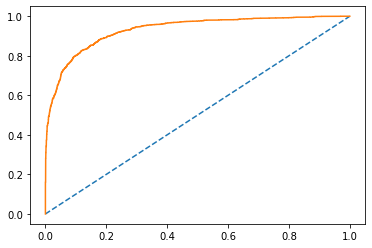

In [117]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
# predict probabilities
probs = model_lr.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [118]:
# Accuracy - Test Data
model_lr.score(X_test, y_test)

0.8479282357966681

AUC: 0.931


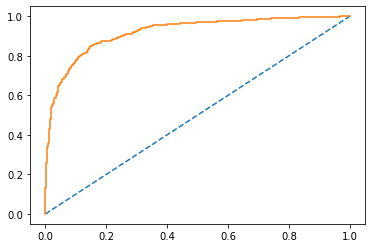

In [119]:
# predict probabilities
probs = model_lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

<AxesSubplot:>

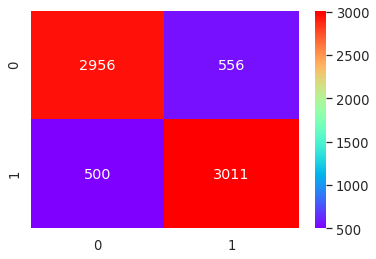

In [120]:
#confusion matrix training Data
cm_lr = confusion_matrix(y_train, ytrain_predict)
cm_lr
sns.set(font_scale = 1.2)
sns.heatmap(cm_lr,annot = True,fmt = 'd', cmap ='rainbow')

In [121]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      3512
           1       0.84      0.86      0.85      3511

    accuracy                           0.85      7023
   macro avg       0.85      0.85      0.85      7023
weighted avg       0.85      0.85      0.85      7023



<AxesSubplot:>

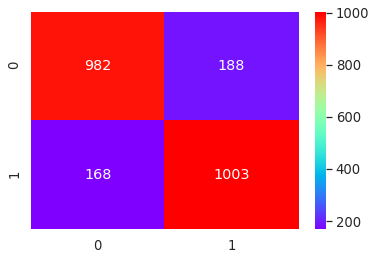

In [122]:
#confusion matrix test Data
cm_test_lr=confusion_matrix(y_test, ytest_predict)
cm_test_lr
sns.set(font_scale = 1.2)
sns.heatmap(cm_test_lr,annot = True,fmt = 'd', cmap='rainbow')

In [123]:
#Test Data Accuracy
test_acc=model_lr.score(X_test,y_test)
test_acc

0.8479282357966681

In [124]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1170
           1       0.84      0.86      0.85      1171

    accuracy                           0.85      2341
   macro avg       0.85      0.85      0.85      2341
weighted avg       0.85      0.85      0.85      2341



## Linear Discriminant Analysis


In [125]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()

In [126]:
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

0.8496369073045706
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      3512
           1       0.84      0.86      0.85      3511

    accuracy                           0.85      7023
   macro avg       0.85      0.85      0.85      7023
weighted avg       0.85      0.85      0.85      7023



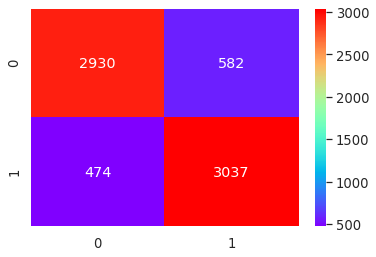

In [127]:
## Performance Matrix on train data set
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)
#confusion matrix training Data
cm_train_lda = confusion_matrix(y_train, y_train_predict)
sns.set(font_scale = 1.2)
sns.heatmap(cm_train_lda, annot = True,fmt = 'd', cmap='rainbow')
print(metrics.classification_report(y_train, y_train_predict))

0.8457923964117898
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1170
           1       0.83      0.86      0.85      1171

    accuracy                           0.85      2341
   macro avg       0.85      0.85      0.85      2341
weighted avg       0.85      0.85      0.85      2341



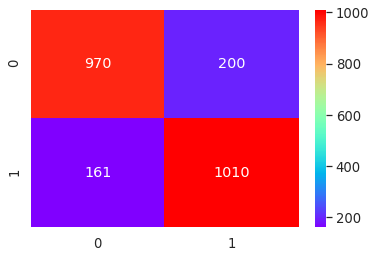

In [128]:
## Performance Matrix on test data set
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)
#confusion matrix test Data
cm_test_lda = confusion_matrix(y_test, y_test_predict)
sns.set(font_scale = 1.2)
sns.heatmap(cm_test_lda, annot = True,fmt = 'd', cmap='rainbow')
print(metrics.classification_report(y_test, y_test_predict))

AUC: 0.930


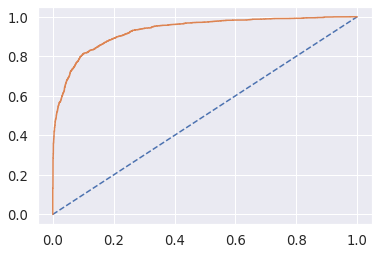

In [129]:
# predict probabilities
probs = LDA_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.930


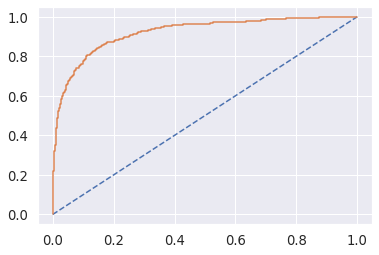

In [130]:
# predict probabilities
probs = LDA_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

## Decision Tree

In [131]:
from sklearn import tree
DT_model= tree.DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3512
           1       1.00      1.00      1.00      3511

    accuracy                           1.00      7023
   macro avg       1.00      1.00      1.00      7023
weighted avg       1.00      1.00      1.00      7023



<AxesSubplot:>

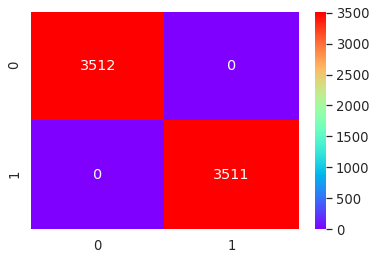

In [132]:
## Performance Matrix on train data set
y_train_predict = DT_model.predict(X_train)
model_score = DT_model.score(X_train, y_train)
print(model_score)
print(metrics.classification_report(y_train, y_train_predict))
#confusion matrix training Data
cm_train_dt = confusion_matrix(y_train, y_train_predict)
sns.set(font_scale = 1.2)
sns.heatmap(cm_train_dt, annot = True,fmt = 'd', cmap='rainbow')

0.9572832123024348
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1170
           1       0.95      0.96      0.96      1171

    accuracy                           0.96      2341
   macro avg       0.96      0.96      0.96      2341
weighted avg       0.96      0.96      0.96      2341

Confusion Matrix


<AxesSubplot:>

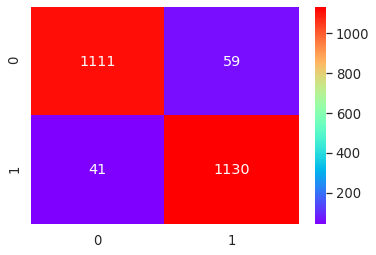

In [133]:
## Performance Matrix on test data set
y_test_predict = DT_model.predict(X_test)
model_score = DT_model.score(X_test, y_test)
print(model_score)
print(metrics.classification_report(y_test, y_test_predict))
#confusion matrix test Data
cm_test_dt = confusion_matrix(y_test, y_test_predict)
sns.set(font_scale = 1.2)
print('Confusion Matrix')
sns.heatmap(cm_test_dt, annot = True,fmt = 'd', cmap='rainbow')

AUC: 1.000


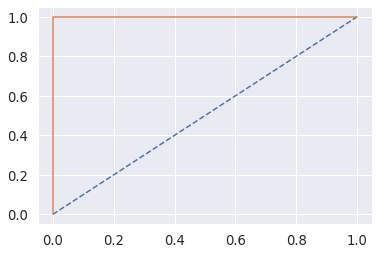

In [134]:
# predict probabilities
probs = DT_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 1.000


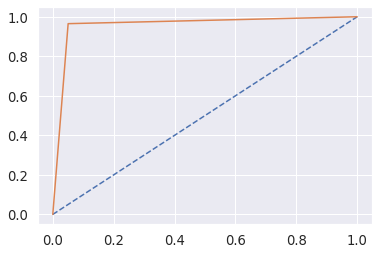

In [135]:
# predict probabilities
probs = DT_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

## Random Forest

In [136]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3512
           1       1.00      1.00      1.00      3511

    accuracy                           1.00      7023
   macro avg       1.00      1.00      1.00      7023
weighted avg       1.00      1.00      1.00      7023

Confusion Matrix


<AxesSubplot:>

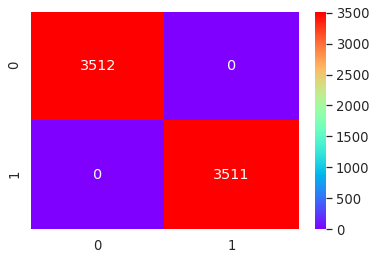

In [137]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.classification_report(y_train, y_train_predict))
#confusion matrix training Data
cm_train_rf = confusion_matrix(y_train, y_train_predict)
print('Confusion Matrix')
sns.set(font_scale = 1.2)
sns.heatmap(cm_train_rf, annot = True,fmt = 'd', cmap='rainbow')

0.9782144382742418
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1170
           1       0.97      0.98      0.98      1171

    accuracy                           0.98      2341
   macro avg       0.98      0.98      0.98      2341
weighted avg       0.98      0.98      0.98      2341

Confusion Matrix


<AxesSubplot:>

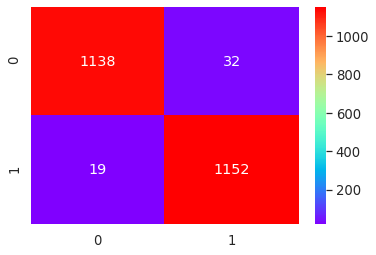

In [138]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.classification_report(y_test, y_test_predict))
#confusion matrix test Data
cm_test_rf = confusion_matrix(y_test, y_test_predict)
sns.set(font_scale = 1.2)
print('Confusion Matrix')
sns.heatmap(cm_test_rf, annot = True,fmt = 'd', cmap='rainbow')

AUC: 1.000


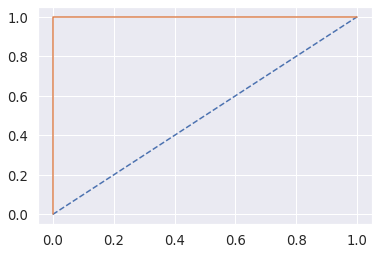

In [139]:
# predict probabilities
probs = RF_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 1.000


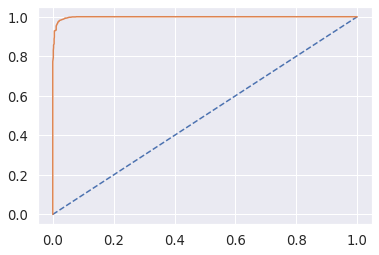

In [140]:
# predict probabilities
probs = RF_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

## KNN Model

In [141]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

0.9498789691015236
              precision    recall  f1-score   support

           0       1.00      0.90      0.95      3512
           1       0.91      1.00      0.95      3511

    accuracy                           0.95      7023
   macro avg       0.95      0.95      0.95      7023
weighted avg       0.95      0.95      0.95      7023

Confusion Matrix


<AxesSubplot:>

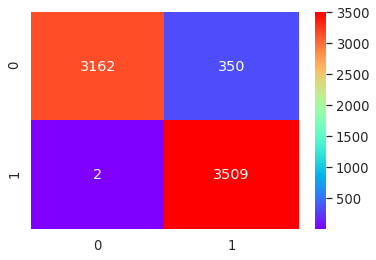

In [142]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.classification_report(y_train, y_train_predict))
#confusion matrix training Data
cm_train_knn = confusion_matrix(y_train, y_train_predict)
print('Confusion Matrix')
sns.set(font_scale = 1.2)
sns.heatmap(cm_train_knn, annot = True,fmt = 'd', cmap='rainbow')

0.915420760358821
              precision    recall  f1-score   support

           0       1.00      0.83      0.91      1170
           1       0.86      1.00      0.92      1171

    accuracy                           0.92      2341
   macro avg       0.93      0.92      0.91      2341
weighted avg       0.93      0.92      0.91      2341

Confusion Matrix


<AxesSubplot:>

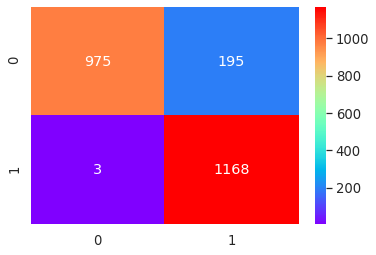

In [143]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.classification_report(y_test, y_test_predict))
#confusion matrix test Data
cm_test_knn = confusion_matrix(y_test, y_test_predict)
sns.set(font_scale = 1.2)
print('Confusion Matrix')
sns.heatmap(cm_test_knn, annot = True,fmt = 'd', cmap='rainbow')

AUC: 1.000


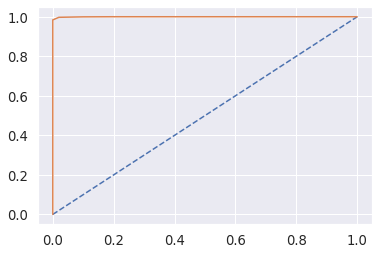

In [144]:
# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 1.000


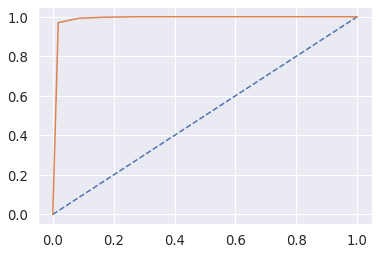

In [145]:
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

## XGBoost

In [146]:
import xgboost as xgb
XGB_model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
XGB_model.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:18:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

0.9125729745123167
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      3512
           1       0.92      0.90      0.91      3511

    accuracy                           0.91      7023
   macro avg       0.91      0.91      0.91      7023
weighted avg       0.91      0.91      0.91      7023

Confusion Matrix


<AxesSubplot:>

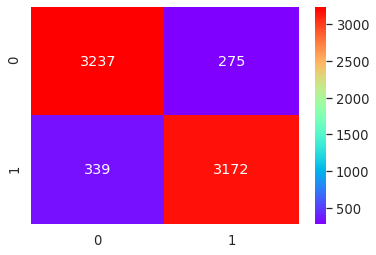

In [147]:
## Performance Matrix on train data set
y_train_predict = XGB_model.predict(X_train)
model_score = XGB_model.score(X_train, y_train)
print(model_score)
print(metrics.classification_report(y_train, y_train_predict))
#confusion matrix training Data
cm_train_knn = confusion_matrix(y_train, y_train_predict)
print('Confusion Matrix')
sns.set(font_scale = 1.2)
sns.heatmap(cm_train_knn, annot = True,fmt = 'd', cmap='rainbow')

0.905595899188381
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1170
           1       0.91      0.90      0.91      1171

    accuracy                           0.91      2341
   macro avg       0.91      0.91      0.91      2341
weighted avg       0.91      0.91      0.91      2341

Confusion Matrix


<AxesSubplot:>

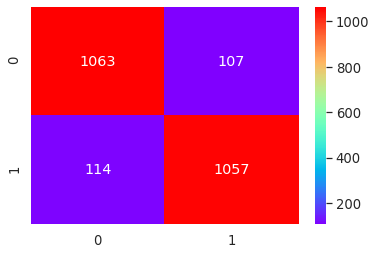

In [148]:
## Performance Matrix on test data set
y_test_predict = XGB_model.predict(X_test)
model_score = XGB_model.score(X_test, y_test)
print(model_score)
print(metrics.classification_report(y_test, y_test_predict))
#confusion matrix test Data
cm_test_knn = confusion_matrix(y_test, y_test_predict)
sns.set(font_scale = 1.2)
print('Confusion Matrix')
sns.heatmap(cm_test_knn, annot = True,fmt = 'd', cmap='rainbow')

AUC: 0.976


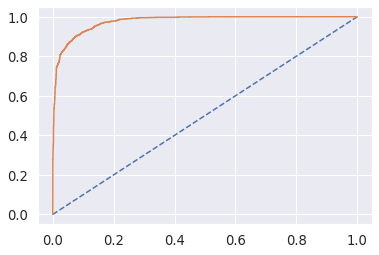

In [149]:
# predict probabilities
probs = XGB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.976


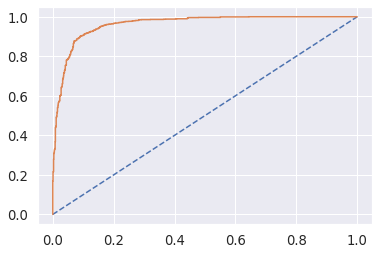

In [150]:
# predict probabilities
probs = XGB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)